<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>

# Challenge S5: Reconocimiento de objetos con CIFAR-10

## Objetivos

El objetivo de este challenge es profundizar en nuestro conocimiento de las redes neuronales convolucionales en Keras.

Para ello, vamos a realizar las siguientes tareas:
- Cargar y comprender el dataset CIFAR10
- Crear y entrenar un modelo desde 0
- Cargar y ajustar un modelo preentrenado
- Obtener las curvas de entrenamiento de ambos modelos para comparar su aprendizaje.


## Tareas


### Configurando el entorno

Como siempre, comenzamos importando los módulos y librerías que vamos a necesitar, además, vamos a fijar una semilla para que las inicializaciones aleatorias sean igual aunque lo ejecutemos varias veces, y así los experimentos siempre salgan igual y poder encontrar fallos más fácilmente.

A continuación, podemos añadir todas las librerías que necesitemos:


In [1]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

# %tensorflow_version 2.x  # sólo es necesaria en colab
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras

import numpy as np
np.random.seed(123)  # for reproducibility

import matplotlib.pyplot as plt


### Cargar y normalizar los datos de entrada: CIFAR-10

Como hemos visto en el worksheet, podemos cargar los datos de la base de datos CIFAR-10 y normalizarlos al rango [0,1] para prepararlos para nuestra red.

Recordad hacer una partición de datos de validación seleccionando 5.000 imágenes de entrenamiento.

A continuación, incluya el código necesario:

In [8]:
# %tensorflow_version 2.x  # sólo es necesaria en colab
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

# Loading the CIFAR-10 datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X_valid = x_train[:5000]
Y_valid = y_train[:5000]

# One hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test,10)
Y_valid = utils.to_categorical(Y_valid,10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
X_valid = X_valid.astype('float32')


# Normalizacion 
x_train  /= 255
x_test /= 255
X_valid /= 255


x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
X_valid = X_valid.reshape(X_valid.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

In [3]:
X_valid.shape,x_train.shape,y_train.shape,y_test.shape

((5000, 32, 32, 3), (50000, 32, 32, 3), (50000, 10), (10000, 10))

In [9]:
print(n_classes)

50000


### Modelo 1: entrenado desde 0

#### Definición del modelo

Para resolver este problema vamos a comenzar con una estructura un poco más profunda que las vistas hasta ahora. Debemos completar la celda a continuación para declarar el siguiente modelo:

- Capa de entrada convolucional, 32 filtros de tamaño 3x3 con función de activación relu (recordar que en la capa de entrada hay que especificar el tamaño de entrada)
- Capa convolucional, 32 filtros de tamaño 3x3, con función de activación relu
- Capa dropout de probabilidad 25%
- Capa Max Pooling de tamaño 2x2
- Capa convolucional, 64 filtros de tamaño 3x3, con función de activación relu
- Capa dropout de probabilidad 25%
- Capa convolucional, 64 filtros de tamaño 3x3, con función de activación relu
- Capa dropout de probabilidad 25%
- Capa Max Pooling de tamaño 2x2
- Capa flatten
- Capa feed-forward (Dense en Keras) con 512 neuronas y función de activación relu
- Capa dropout de probabilidad 40%
- Capa de salida feed-forward (Dense en Keras) con función de activación softmax

Para resolver este paso sería interesante fijarse en la documentación de keras https://keras.io/layers/core/ 

Además, se puede comprobar el modelo creado con la función "summary": model.summary()

In [5]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Dropout
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2,verbose=1)

early_stopping = EarlyStopping(
                    monitor='val_loss',
                    min_delta=0.001,
                    patience = 3,
                    verbose=2,
                    restore_best_weights=True,
)

In [16]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

import matplotlib.pyplot as plt



def plotCurves(history,epochs):

    plt.figure(0)
    plt.plot(history.history['accuracy'],'r')
    plt.plot(history.history['val_accuracy'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
 
 
    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
 
 
    plt.show()
    

In [14]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(Dropout(0.4))
model1.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model1.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(Dropout(0.4))
model1.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(Dropout(0.4))
model1.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax'))


#### Compilando y entrenando el modelo

El siguiente paso que debemos hacer es compilar y entrenar el modelo.

En esta ocasión vamos a utilizar la función de coste 'categorical_crossentropy' y el optimizador adam. Además añadiremos, como habitualmente, la métrica 'accuracy' para visualizarla.

Recordad utilizar el conjunto de datos de validación que hemos separado del train al principio del challenge.

Para entrenar el modelo, definimos el número de épocas (ejemplo, 100) y el tamaño del batch (ejemplo, 128). 

Si trabajamos con todo CIFAR-10 el entrenamiento va a ser muy lento, por lo que podemos diezmar los datos (usar 500 datos de train y 100 de test) y utilizar tan solo 10 épocas hasta estar 100% seguros de que todo está bien hecho. Una vez que la programación sea correcta ya podemos aumentar a todos los datos y correr la red. Una opción muy interesante es correr todo el entrenamiento en colab con GPU, lo que acelerará muchísimo el entrenamiento.

Conviene guardar la salida de la función fit ('history'), para analizar posteriormente su rendimiento.

Escribir el código necesario para hacer esto en la celda siguiente:

In [ ]:
model1.summary()

model1.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = model1.fit(x_train, y_train, batch_size=128, epochs=10, 
          verbose=1, validation_data=(X_valid, Y_valid),callbacks=early_stopping,use_multiprocessing=True)

score = model1.evaluate(x_test, y_test, verbose=0)
print(score)


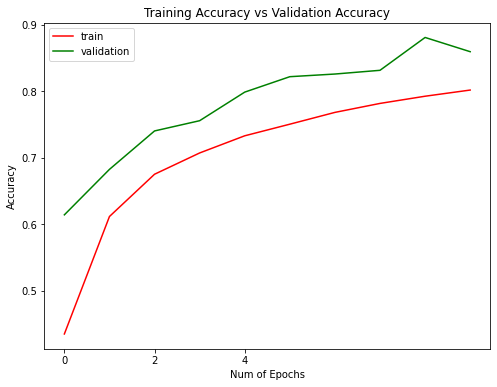

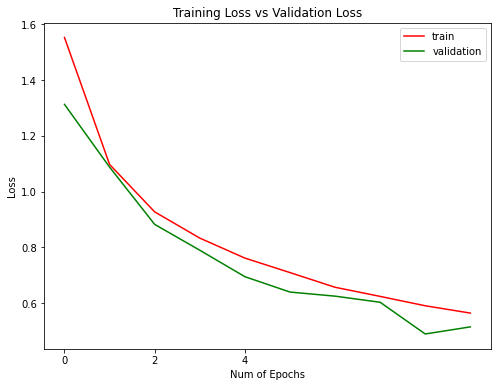

In [17]:
plotCurves(history,5)

### Modelo 2 (preentrenado)

#### Definición del modelo

El modelo será el siguiente:

- Modelo preentrenado VGG16 (recordad no cargar la parte final, utilizar pesos de imagenet y congelar)
- Capa feed-forward de tamaño 512
- Capa dropout de probabilidad 40%
- Capa de salida 


#### Compilando y entrenando el modelo

Repetir ahora los pasos de compilación y entrenamiento anteriores con el nuevo modelo. 

NOTA: Guardar el historial del entrenamiento en una variable 'history2' para evaluar su rendimiento y compararlo con el anterior.


### Comparación de rendimientos

#### Rendimiento modelo 1 (entrenado desde 0)

Utilizando el material de la sesión anterior, a continuación, pinte las curvas de rendimiento (train y test) del modelo 1.

¿Te parecen buenas curvas de aprendizaje?

El efecto que se muestra, ¿tiene algún nombre? ¿A qué cosas suele deberse? En nuestro caso, ¿a qué se debe?


#### Rendimiento modelo 2 (preentrenamiento)

Repita el análisis para el modelo 2.

Analiza ahora las curvas para el segundo modelo. ¿Te parecen mejores las curvas ahora? 

### Opcional: Criterio de parada

En muchas ocasiones, en lugar de estimar el número máximo de iteraciones o épocas, lo que se hace es poner un criterio de parada, es decir, algún mecanismo de control que pare el entrenamiento cuando se cumplen ciertas condiciones en un subconjunto de los datos.

Cuando queremos aplicar este tipo de técnicas, solemos separar el conjunto de datos de entrenamiento en 2 conjuntos, uno de "train", con el que entrenamos el modelo, y uno de validación, que utilizamos para tomar este tipo de decisiones.

Investigar formas de implementar algún tipo de criterio de parada y ponerlo en funcionamiento con alguno de los modelos que acabamos de entrenar.